# Abhi Devgirikar
# Stock Market Prediction using Numerical and Textual Analysis

The task is to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentimental analysis of news headlines.

Download historical stock prices from https://finance.yahoo.com/

Download textual (news) data from https://bit.ly/36fFPI6


### Importing Required Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

#### Loading Textual (News) data

In [4]:
ndf = pd.read_csv("india-news-headlines.csv")

In [5]:
ndf.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [6]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
publish_date         int64
headline_category    object
headline_text        object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


# Data Pre-processing 

In [7]:
ndf['published_date'] = np.array([str(str(str(x)[:4]) + '/' + str(str(x)[4:6]) + '/' + str(str(x)[6:])) for x in ndf['publish_date']])

In [8]:
ndf.head()

,publish_date,headline_category,headline_text,published_date
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,20010102,unknown,America's unwanted heading for India?,2001/01/02
4,20010102,unknown,For bigwigs; it is destination Goa,2001/01/02


In [9]:
del ndf["publish_date"]

In [10]:
ndf.head()

,headline_category,headline_text,published_date
0,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,unknown,America's unwanted heading for India?,2001/01/02
4,unknown,For bigwigs; it is destination Goa,2001/01/02


In [11]:
ndf['published_date'] = pd.to_datetime(ndf['published_date'])

In [12]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
headline_category    object
headline_text        object
published_date       datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [13]:
ndf = ndf[['published_date', 'headline_text']]

In [14]:
ndf.columns = ['published_date', 'headline']

In [15]:
ndf.head()

,published_date,headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


#### Headlines having same dates

In [17]:
dict_news = {}

In [18]:
t1 = ndf.loc[0, 'published_date']
t2 = str(ndf.loc[0, 'headline'])
for x in range(1, len(ndf)):
    if ndf.loc[x, 'published_date']==t1:
        t2 += '. ' + str(ndf.loc[x, 'headline'])
    else:
        dict_news[ndf.loc[x-1, 'published_date']] = t2
        t2 = ""
        t1 = ndf.loc[x, 'published_date']

In [19]:
len(dict_news)

7079

In [20]:
indexes = np.arange(0, len(dict_news))

In [21]:
df_news = pd.DataFrame(indexes)
df_news['Published_Date'] = dict_news.keys()


In [22]:
df_news.head()

,0,Published_Date
0,0,2001-01-01
1,1,2001-01-02
2,2,2001-01-03
3,3,2001-01-04
4,4,2001-01-05


In [23]:
l = []
for i in dict_news.keys():
    l.append(dict_news[i])

In [24]:
l[0]

'win over cena satisfying but defeating undertaker bigger roman reigns'

In [25]:
df_news['Headline'] = np.array(l)

In [26]:
df_news.head()

,0,Published_Date,Headline
0,0,2001-01-01,win over cena satisfying but defeating underta...
1,1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...
2,2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...
3,3,2001-01-04,. Vajpayee gives big push to tech education; R...
4,4,2001-01-05,. Hawkings' day out. Light combat craft takes ...


In [27]:
del df_news[0]

In [28]:
df_news.head()

,Published_Date,Headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...
3,2001-01-04,. Vajpayee gives big push to tech education; R...
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...


# Sentiment Analysis

In [29]:
from textblob import TextBlob
polarity = []
subjectivity = []
tuples = []
for i in df_news['Headline'].values:
    my_valence = TextBlob(i)
    tuples.append(my_valence.sentiment)

In [30]:
for i in tuples:
    polarity.append(i[0])
    subjectivity.append(i[1])

In [31]:
df_news['Polarity'] = np.array(polarity)
df_news['Subjectivity'] = np.array(subjectivity)

In [32]:
df_news.head()

,Published_Date,Headline,Polarity,Subjectivity
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984


In [36]:
temp = ['Positive', 'Negative', 'Neutral']
temp1 = ['Factual', 'Public']
polarity = []
subjectivity = []
for i in range(len(df_news)):
    pol = df_news.iloc[i]['Polarity']
    sub = df_news.iloc[i]['Subjectivity']
    if pol>=0:
        if pol>=0.2:
            polarity.append(temp[0])
        else:
            polarity.append(temp[2])
    else:
        if pol<=-0.2:
            polarity.append(temp[1])
        else:
            polarity.append(temp[2])
    
    if sub>=0.4:
        subjectivity.append(temp1[1])
    else:
        subjectivity.append(temp1[0])

In [37]:
df_news['Sentiment'] = polarity
df_news['Opinion'] = subjectivity

In [38]:
df_news.head()

,Published_Date,Headline,Polarity,Subjectivity,Sentiment,Opinion
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,Positive,Public
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public


In [90]:
df_news.tail()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion
7074,2020-06-25,. Telangana: Senior Congress leader tests+ve f...,0.026626,0.403808,Neutral,Public
7075,2020-06-26,. up hammers out 60k proposals of rs 870cr ahe...,0.067991,0.381251,Neutral,Factual
7076,2020-06-27,. Major Ravi to helm movie on Indo-Chinese con...,0.079290,0.398808,Neutral,Factual
7077,2020-06-28,. Sports without spectators: 'Who will cheer f...,0.056252,0.401576,Neutral,Public
7078,2020-06-29,. Anna Eden gets creative with husband and MP ...,0.059637,0.392916,Neutral,Factual


In [39]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079 entries, 0 to 7078
Data columns (total 6 columns):
Published_Date    7079 non-null datetime64[ns]
Headline          7079 non-null object
Polarity          7079 non-null float64
Subjectivity      7079 non-null float64
Sentiment         7079 non-null object
Opinion           7079 non-null object
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 332.0+ KB


# Visualization of Distributed Sentiments

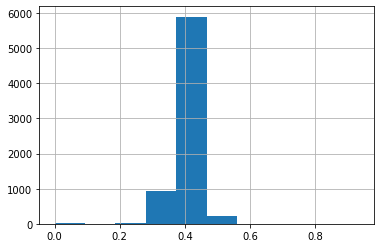

In [40]:
#Histogram Subjectivity
plt.figure(figsize=(6,4))
df_news['Subjectivity'].hist()
plt.show()

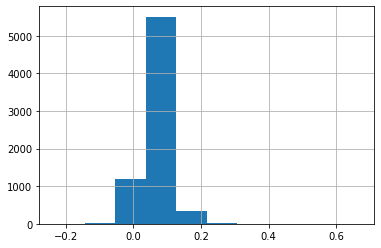

In [41]:
#histogram Polarity
plt.figure(figsize=(6,4))
df_news['Polarity'].hist()
plt.show()

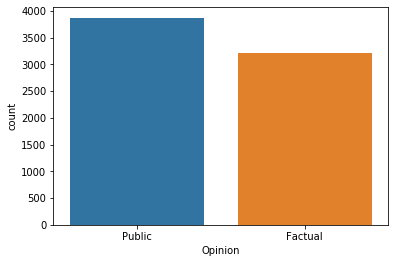

In [42]:
#countplot
sns.countplot(df_news['Opinion'])

# Loading Historical Stock Price Data

In [43]:
sdf = pd.read_csv('BSESN.csv')

In [44]:
sdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-22,39233.398438,39426.468750,38924.851563,38963.839844,38963.839844,54500.0
1,2019-10-23,39063.839844,39196.671875,38866.078125,39058.828125,39058.828125,41000.0
2,2019-10-24,39223.011719,39327.148438,38840.761719,39020.390625,39020.390625,36600.0
3,2019-10-25,39201.671875,39241.609375,38718.269531,39058.058594,39058.058594,48600.0
4,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
sdf.shape

(250, 7)

In [46]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Date         250 non-null object
Open         248 non-null float64
High         248 non-null float64
Low          248 non-null float64
Close        248 non-null float64
Adj Close    248 non-null float64
Volume       248 non-null float64
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [47]:
sdf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,37322.398091,37574.623582,36950.800616,37247.012562,37247.012562,22031.048387
std,3962.046890,3811.250200,4118.735824,3967.546574,3967.546574,18530.809330
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,0.000000
25%,34305.207031,34699.283203,33955.879883,34237.300781,34237.300781,13600.000000
50%,38476.410157,38742.685547,38217.509765,38413.355469,38413.355469,18400.000000
75%,40610.306641,40794.209961,40336.801758,40584.655274,40584.655274,24800.000000
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,188300.000000


In [48]:
sdf['hl_pct']=((sdf['High']-sdf['Low'])/sdf['Low'])*100
sdf['pct_change']=((sdf['Close']-sdf['Open'])/sdf['Open'])*100

In [49]:
sdf = sdf.drop(['Open','High','Close','Low'], axis=1)

In [50]:
sdf.head()

,Date,Adj Close,Volume,hl_pct,pct_change
0,2019-10-22,38963.839844,54500.0,1.288681,-0.687064
1,2019-10-23,39058.828125,41000.0,0.850597,-0.012830
2,2019-10-24,39020.390625,36600.0,1.252258,-0.516587
3,2019-10-25,39058.058594,48600.0,1.351661,-0.366345
4,2019-10-27,NaN,NaN,NaN,NaN


In [51]:
sdf['Date'] = pd.to_datetime(sdf['Date'])

In [52]:
sdf.head()

,Date,Adj Close,Volume,hl_pct,pct_change
0,2019-10-22,38963.839844,54500.0,1.288681,-0.687064
1,2019-10-23,39058.828125,41000.0,0.850597,-0.012830
2,2019-10-24,39020.390625,36600.0,1.252258,-0.516587
3,2019-10-25,39058.058594,48600.0,1.351661,-0.366345
4,2019-10-27,NaN,NaN,NaN,NaN


In [55]:
sdf = sdf.dropna()
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 249
Data columns (total 5 columns):
Date          248 non-null datetime64[ns]
Adj Close     248 non-null float64
Volume        248 non-null float64
hl_pct        248 non-null float64
pct_change    248 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.6 KB


In [56]:
df_news.columns = ['Date', 'Headline', 'Polarity', 'Subjectivity', 'Sentiment', 'Opinion']

# Merging the News and Stocks Datasets on the basis of Dates

In [58]:
mdf = df_news.merge(sdf, how='inner', on='Date', left_index = True)

In [59]:
mdf.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,hl_pct,pct_change
0,2019-10-22,. When I compose a song; I don't think whether...,0.044899,0.403248,Neutral,Public,38963.839844,54500.0,1.288681,-0.687064
1,2019-10-23,. Need fitness motivation? You have to attend ...,0.053053,0.400712,Neutral,Public,39058.828125,41000.0,0.850597,-0.012830
2,2019-10-24,. Now; recognition by Punjab government must f...,0.078351,0.437144,Neutral,Public,39020.390625,36600.0,1.252258,-0.516587
3,2019-10-25,. Dhanteras 2019: Date; time; puja vidhi; shub...,0.068307,0.387471,Neutral,Factual,39058.058594,48600.0,1.351661,-0.366345
5,2019-10-29,. Happy Bhai Dooj 2019: Images; Wishes; Messag...,0.056007,0.446804,Neutral,Public,39831.839844,50500.0,1.688716,1.370078


In [60]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 169
Data columns (total 10 columns):
Date            168 non-null datetime64[ns]
Headline        168 non-null object
Polarity        168 non-null float64
Subjectivity    168 non-null float64
Sentiment       168 non-null object
Opinion         168 non-null object
Adj Close       168 non-null float64
Volume          168 non-null float64
hl_pct          168 non-null float64
pct_change      168 non-null float64
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 14.4+ KB


### Required Column 

In [61]:
req_df = mdf[['Date', 'Polarity', 'Subjectivity','Adj Close','hl_pct','pct_change']]
req_df.head()

,Date,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
0,2019-10-22,0.044899,0.403248,38963.839844,1.288681,-0.687064
1,2019-10-23,0.053053,0.400712,39058.828125,0.850597,-0.012830
2,2019-10-24,0.078351,0.437144,39020.390625,1.252258,-0.516587
3,2019-10-25,0.068307,0.387471,39058.058594,1.351661,-0.366345
5,2019-10-29,0.056007,0.446804,39831.839844,1.688716,1.370078


In [62]:
req_df = req_df.set_index('Date')

In [63]:
req_df.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
Date,,,,,
2019-10-22,0.044899,0.403248,38963.839844,1.288681,-0.687064
2019-10-23,0.053053,0.400712,39058.828125,0.850597,-0.012830
2019-10-24,0.078351,0.437144,39020.390625,1.252258,-0.516587
2019-10-25,0.068307,0.387471,39058.058594,1.351661,-0.366345
2019-10-29,0.056007,0.446804,39831.839844,1.688716,1.370078


# Feature Scaling using MinMaxScaler

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(req_df))
df1.columns = req_df.columns
df1.index=req_df.index
df1.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
Date,,,,,
2019-10-22,0.364508,0.504190,0.812866,0.049142,0.379896
2019-10-23,0.438457,0.483084,0.818813,0.024667,0.421943
2019-10-24,0.667876,0.786341,0.816407,0.047107,0.390527
2019-10-25,0.576786,0.372858,0.818765,0.052661,0.399897
2019-10-29,0.465240,0.866756,0.867213,0.071492,0.508184


In [66]:
train = df1[: int(0.7*(len(df1)))]  #70 percent
test = df1[int(0.7*(len(df1))):]    #30 percent

In [67]:
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog = train)
fitted = model.fit()

 Predicted vs Test

In [68]:
pred = fitted.forecast(fitted.y, steps=len(test))
predicted = pd.DataFrame(pred, columns=df1.columns)

In [69]:
predicted.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
0,0.499007,0.480748,0.290782,0.296335,0.437565
1,0.507802,0.466866,0.284221,0.287530,0.399396
2,0.505545,0.466046,0.281260,0.292980,0.405135
3,0.505589,0.464537,0.277475,0.294767,0.404182
4,0.505874,0.464300,0.273716,0.296578,0.404266


In [70]:
test.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
Date,,,,,
2020-04-16,0.738124,0.600080,0.289353,0.123077,0.527821
2020-04-17,0.507853,0.520604,0.351095,0.113889,0.409355
2020-04-20,0.670920,0.512154,0.354807,0.077601,0.343334
2020-04-21,0.659395,0.371802,0.291488,0.073121,0.382401
2020-04-22,0.625664,0.588219,0.337999,0.140228,0.528527


Checking the accuracy

In [71]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predicted['Adj Close'], test['Adj Close']))

0.2615183658492245